Download dan load dataset

In [1]:
!pip install ucimlrepo pandas --quiet
import pandas as pd
import numpy as np
import os
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib
from google.colab import files

In [2]:
# Mengambil dataset dari UCI
drug = fetch_ucirepo(id=373)

# Memisahkan fitur dan target (label)
X = drug.data.features
y = drug.data.targets

# Membuat DataFrame lengkap (fitur + target)
df = pd.concat([X, y], axis=1)

df

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


Exploratory Data Analysis

/tmp/ipython-input-142197670.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_cannabis', data=df_viz, palette='viridis')
/tmp/ipython-input-142197670.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label_cannabis', y='nscore', data=df_viz, palette='coolwarm')


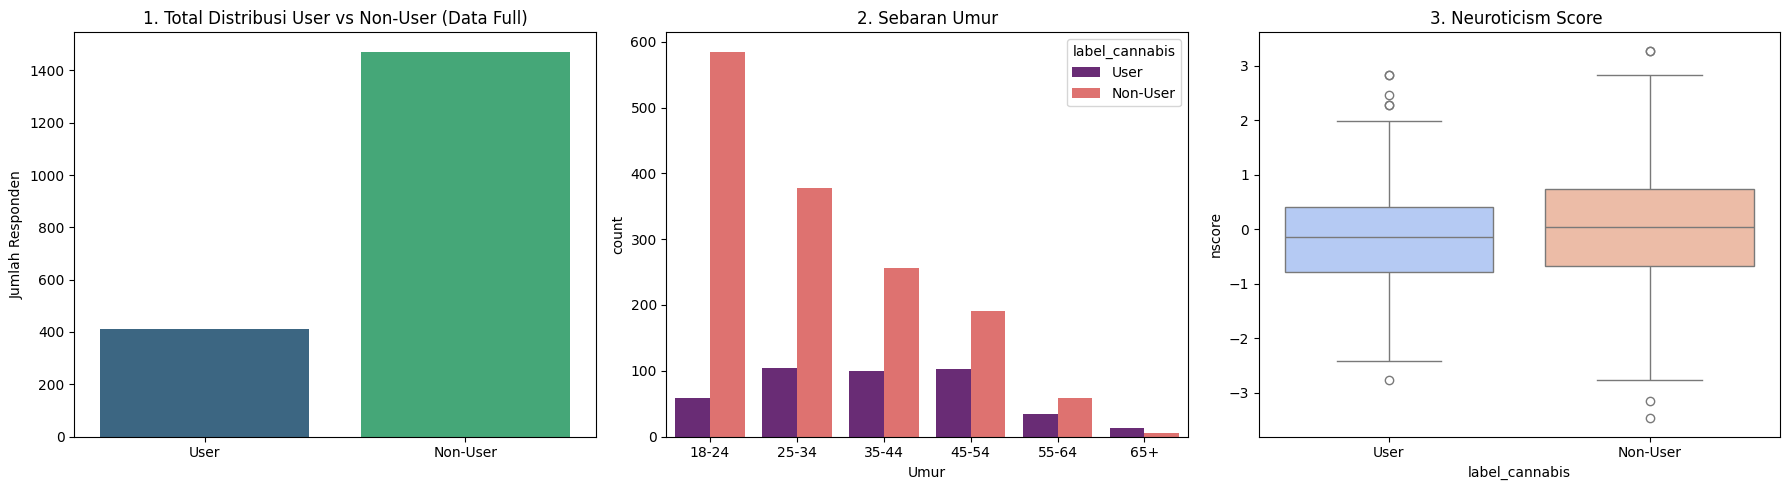

In [3]:
# --- VISUALISASI EDA  ---

df_viz = X.copy()
df_viz['target'] = y['cannabis']

# 2. Definisi Mapping
age_map = {
    -0.95197: '18-24',
    -0.07854: '25-34',
    0.49788:  '35-44',
    1.09449:  '45-54',
    1.82213:  '55-64',
    2.59171:  '65+'
}

gender_map = {
    0.48246: 'Female',
    -0.48246: 'Male'
}

# 3. Terapkan Mapping ke Kolom Baru
df_viz['label_age'] = df_viz['age'].map(age_map)
df_viz['label_gender'] = df_viz['gender'].map(gender_map)
df_viz['label_cannabis'] = df_viz['target'].apply(lambda x: 'User' if x == 'CL0' else 'Non-User')

plt.figure(figsize=(18, 5))

# Grafik 1: Total Distribusi Pengguna
plt.subplot(1, 3, 1)
sns.countplot(x='label_cannabis', data=df_viz, palette='viridis')
plt.title('1. Total Distribusi User vs Non-User (Data Full)')
plt.xlabel('')
plt.ylabel('Jumlah Responden')

# Grafik 2: Penggunaan Berdasarkan Umur
plt.subplot(1, 3, 2)
order_age = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
sns.countplot(x='label_age', hue='label_cannabis', data=df_viz, order=order_age, palette='magma')
plt.title('2. Sebaran Umur')
plt.xlabel('Umur')

# Grafik 3: Skor Neuroticism
plt.subplot(1, 3, 3)
sns.boxplot(x='label_cannabis', y='nscore', data=df_viz, palette='coolwarm')
plt.title('3. Neuroticism Score ')

plt.tight_layout()
plt.show()

Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1885 non-null   float64
 1   gender     1885 non-null   float64
 2   education  1885 non-null   float64
 3   country    1885 non-null   float64
 4   ethnicity  1885 non-null   float64
 5   nscore     1885 non-null   float64
 6   escore     1885 non-null   float64
 7   oscore     1885 non-null   float64
 8   ascore     1885 non-null   float64
 9   cscore     1885 non-null   float64
 10  impuslive  1885 non-null   float64
 11  ss         1885 non-null   float64
 12  alcohol    1885 non-null   object 
 13  amphet     1885 non-null   object 
 14  amyl       1885 non-null   object 
 15  benzos     1885 non-null   object 
 16  caff       1885 non-null   object 
 17  cannabis   1885 non-null   object 
 18  choc       1885 non-null   object 
 19  coke       1885 non-null   object 
 20  crack   

In [5]:
len(df)

1885

In [6]:
df.head()

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [7]:
df.isnull().sum()

,0
age,0
gender,0
education,0
country,0
ethnicity,0
nscore,0
escore,0
oscore,0
ascore,0
cscore,0


In [8]:
# --- CEK DATA DUPLIKAT ---

# 1. Hitung jumlah baris yang duplikat
jumlah_duplikat = df.duplicated().sum()

print(f"Jumlah Data Duplikat: {jumlah_duplikat}")

# 2. (Opsional) Tampilkan data yang duplikat jika ada
if jumlah_duplikat > 0:
    print("\nContoh data yang duplikat:")
    print(df[df.duplicated()].head())
else:
    print("✅ Data aman (Clean), tidak ada duplikat.")

Jumlah Data Duplikat: 0
✅ Data aman (Clean), tidak ada duplikat.


In [9]:
df.dtypes

,0
age,float64
gender,float64
education,float64
country,float64
ethnicity,float64
nscore,float64
escore,float64
oscore,float64
ascore,float64
cscore,float64


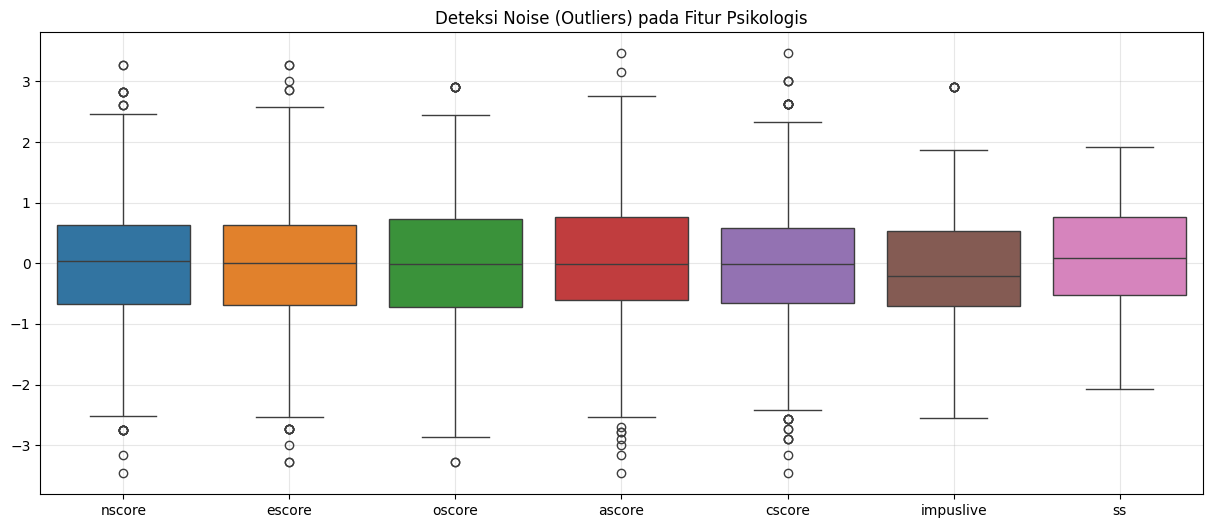

In [10]:
# --- CEK NOISE / OUTLIERS ---

# Titik-titik hitam di luar garis "kumis" adalah NOISE (Outliers)
plt.figure(figsize=(15, 6))
cols_to_check = ['nscore', 'escore', 'oscore', 'ascore', 'cscore', 'impuslive', 'ss']
sns.boxplot(data=df[cols_to_check])
plt.title("Deteksi Noise (Outliers) pada Fitur Psikologis")
plt.grid(True, alpha=0.3)
plt.show()

/tmp/ipython-input-1753727219.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['cannabis'], order=urutan, palette='viridis')


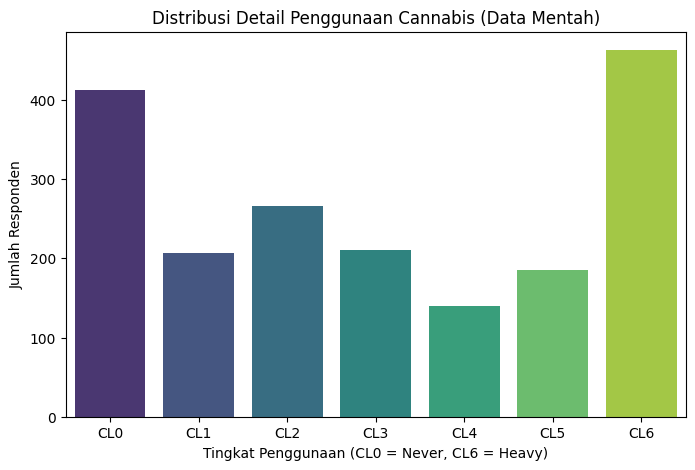

----------------------------------------
📊 ANALISIS KETIMPANGAN (UNTUK MODELING):
Total Data      : 1885
Non-User (CL0)  : 413 orang (Akan jadi Label 0)
User (CL1-CL6)  : 1472 orang (Akan jadi Label 1)

⚠️ Kesimpulan: Data IMBALANCED dengan rasio 3.6 : 1
   (User jauh lebih banyak daripada Non-User)
----------------------------------------


In [11]:
# --- CEK DISTRIBUSI AWAL (RAW DATA) ---

# 1. Tampilkan Grafik Data Asli (CL0 - CL6)
plt.figure(figsize=(8, 5))
urutan = sorted(df['cannabis'].unique())
sns.countplot(x=df['cannabis'], order=urutan, palette='viridis')

plt.title('Distribusi Detail Penggunaan Cannabis (Data Mentah)')
plt.xlabel('Tingkat Penggunaan (CL0 = Never, CL6 = Heavy)')
plt.ylabel('Jumlah Responden')
plt.show()

# 2. Hitung Imbalance .
non_user_count = len(df[df['cannabis'] == 'CL0'])
user_count = len(df) - non_user_count

print("-" * 40)
print("📊 ANALISIS KETIMPANGAN (UNTUK MODELING):")
print(f"Total Data      : {len(df)}")
print(f"Non-User (CL0)  : {non_user_count} orang (Akan jadi Label 0)")
print(f"User (CL1-CL6)  : {user_count} orang (Akan jadi Label 1)")

ratio = user_count / non_user_count
print(f"\n⚠️ Kesimpulan: Data IMBALANCED dengan rasio {ratio:.1f} : 1")
print("   (User jauh lebih banyak daripada Non-User)")
print("-" * 40)

Featur Engineering

In [12]:
# 1. Definisi Daftar Kolom Fitur (Input)
feature_cols = [
    'age', 'gender',
    'nscore', 'escore', 'oscore', 'ascore', 'cscore',
    'impuslive', 'ss']

# 2. Definisi Kolom Target
target_col = 'cannabis'

# 3. Buat DataFrame Baru (df_selected)
df_selected = df[feature_cols + [target_col]].copy()

# 4. Tampilkan Hasil
print("=== Kolom yang digunakan ===")
print(f"Jumlah Fitur : {len(feature_cols)} kolom")
print(f"Nama Fitur   : {feature_cols}")
print(f"Target       : {target_col}")
print(f"Ukuran Data  : {df_selected.shape}")

print("\n=== PREVIEW DATA BARU (df_selected) ===")
df_selected.head()

=== Kolom yang digunakan ===
Jumlah Fitur : 9 kolom
Nama Fitur   : ['age', 'gender', 'nscore', 'escore', 'oscore', 'ascore', 'cscore', 'impuslive', 'ss']
Target       : cannabis
Ukuran Data  : (1885, 10)

=== PREVIEW DATA BARU (df_selected) ===


,age,gender,nscore,escore,oscore,ascore,cscore,impuslive,ss,cannabis
0,0.49788,0.48246,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL0
1,-0.07854,-0.48246,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL4
2,0.49788,-0.48246,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL3
3,-0.95197,0.48246,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL2
4,0.49788,0.48246,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL3


Preprocessing


In [13]:
# --- PREPROCESSING ---
# 1. Ubah isi kolom 'cannabis' langsung menjadi angka
# Jika 'CL0' -> 0 (Non-User), selain itu -> 1 (User)
df_selected['cannabis'] = df_selected['cannabis'].apply(lambda x: 0 if x == 'CL0' else 1)

# 2. Pisahkan Fitur dan Target
# X = Semua kolom KECUALI 'cannabis'
X = df_selected.drop(columns=['cannabis'])

# y = Kolom 'cannabis' saja
y = df_selected['cannabis']

print("-" * 30)
print(" Data Target (y):")
print(y.head())
print("\nDistribusi:")
print(y.value_counts())

------------------------------
 Data Target (y):
0    0
1    1
2    1
3    1
4    1
Name: cannabis, dtype: int64

Distribusi:
cannabis
1    1472
0     413
Name: count, dtype: int64


In [14]:
#Simpan Data Hasil Preprocessing ke CSV
# gabungkan lagi X dan y sebentar untuk disimpan
df_final = X.copy()
df_final['target'] = y

nama_file_baru = 'data_processed.csv'
df_final.to_csv(nama_file_baru, index=False)

print(f"\n✅ Data berhasil disimpan ke: {nama_file_baru}")

df_final.head()


✅ Data berhasil disimpan ke: data_processed.csv


,age,gender,nscore,escore,oscore,ascore,cscore,impuslive,ss,target
0,0.49788,0.48246,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,-0.07854,-0.48246,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,0.49788,-0.48246,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
3,-0.95197,0.48246,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1
4,0.49788,0.48246,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1


Splitting Data

In [15]:
# --- SPLITTING DATA ---

# Tahap 1: Ambil 70% untuk Training
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Tahap 2: Pecah sisa 30% tadi menjadi dua bagian sama besar (Validation & Test)
# 50% dari 30% total = 15% total data asli
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print("✅ Data berhasil dibagi.")
print(f"Training Set   (70%) : {X_train.shape[0]} baris")
print(f"Validation Set (15%) : {X_val.shape[0]} baris")
print(f"Test Set       (15%) : {X_test.shape[0]} baris")

✅ Data berhasil dibagi.
Training Set   (70%) : 1319 baris
Validation Set (15%) : 283 baris
Test Set       (15%) : 283 baris


Normalisasi Fitur

In [16]:
# --- NORMALISASI FITUR (StandardScaler) ---

# 1. Inisialisasi Scaler
scaler = StandardScaler()

# 2. FIT hanya pada data TRAIN (Agar tidak curang/data leakage)
scaler.fit(X_train)

# 3. TRANSFORM semua data (Train, Val, Test) menggunakan rumus dari Train
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print("✅ Normalisasi Selesai!")
print("Data sekarang tersimpan di variabel:")
print("   - X_train_scaled, y_train")
print("   - X_val_scaled,   y_val")
print("   - X_test_scaled,  y_test")

print("\nContoh data setelah dinormalisasi (Lihat, angkanya jadi sekitar -2 s/d 2):")
print(X_train_scaled.head())

✅ Normalisasi Selesai!
Data sekarang tersimpan di variabel:
   - X_train_scaled, y_train
   - X_val_scaled,   y_val
   - X_test_scaled,  y_test

Contoh data setelah dinormalisasi (Lihat, angkanya jadi sekitar -2 s/d 2):
        age    gender    nscore    escore    oscore    ascore    cscore  \
0  1.999485 -0.984204 -0.937496  0.477108 -0.583392 -0.338453 -0.532605   
1 -0.135615  1.016050  0.844858 -1.648428 -0.319042 -1.530822 -1.149253   
2 -0.135615 -0.984204  0.534370 -2.230087  0.441119  0.737345  0.262392   
3 -1.116775 -0.984204  0.752846  0.000679  2.140797  0.099973 -1.533649   
4 -1.116775  1.016050 -0.149495  0.967099 -1.550902  2.228841  1.647711   

   impuslive        ss  
0  -0.219892 -0.540865  
1  -1.442474 -1.227865  
2  -0.219892  2.026728  
3   1.367158  0.813739  
4  -0.219892 -0.540865  


Modeling


🚀 Training Logistic Regression...
✅ Model Selesai Dilatih!
🎯 Akurasi pada Validation Set: 81.27%
----------------------------------------
Laporan Klasifikasi (Validation):
              precision    recall  f1-score   support

           0       0.64      0.34      0.44        62
           1       0.84      0.95      0.89       221

    accuracy                           0.81       283
   macro avg       0.74      0.64      0.66       283
weighted avg       0.79      0.81      0.79       283



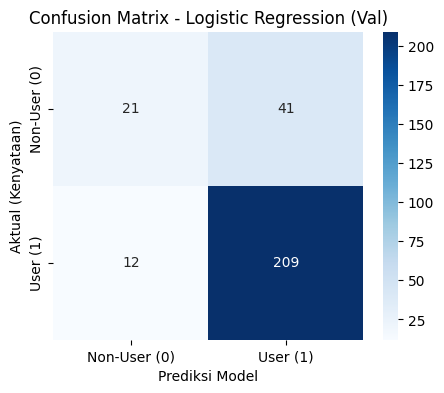


📦 Sedang menyimpan dan mendownload model...
✅ Model berhasil disimpan sebagai: model_lr.pkl


In [ ]:
# --- MODEL 1: LOGISTIC REGRESSION ---
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# 1. Fungsi Plot Confusion Matrix
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-User (0)', 'User (1)'],
                yticklabels=['Non-User (0)', 'User (1)'])
    plt.xlabel('Prediksi Model')
    plt.ylabel('Aktual (Kenyataan)')
    plt.title(title)
    plt.show()

# 2. Training Model

print("🚀 Training Logistic Regression...")
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)

# 3. Prediksi ke Data Validasi
y_pred_val_lr = model_lr.predict(X_val_scaled)

# 4. Evaluasi Akurasi
acc_lr = accuracy_score(y_val, y_pred_val_lr)
print(f"✅ Model Selesai Dilatih!")
print(f"🎯 Akurasi pada Validation Set: {acc_lr:.2%}")
print("-" * 40)

# 5. Laporan Detail
print("Laporan Klasifikasi (Validation):")
print(classification_report(y_val, y_pred_val_lr))

# 6. Confusion Matrix
plot_cm(y_val, y_pred_val_lr, "Confusion Matrix - Logistic Regression (Val)")

print("\n📦 Sedang menyimpan dan mendownload model...")

# Simpan model ke file .pkl
nama_file_lr = 'model_lr.pkl'
joblib.dump(model_lr, nama_file_lr)
print(f"✅ Model berhasil disimpan sebagai: {nama_file_lr}")

🚀 Training SVM (Balanced Weight)...
✅ Model SVM Selesai Dilatih!
🎯 Akurasi SVM pada Validation Set: 75.97%
----------------------------------------
Laporan Klasifikasi (Validation):
              precision    recall  f1-score   support

           0       0.47      0.76      0.58        62
           1       0.92      0.76      0.83       221

    accuracy                           0.76       283
   macro avg       0.69      0.76      0.71       283
weighted avg       0.82      0.76      0.78       283



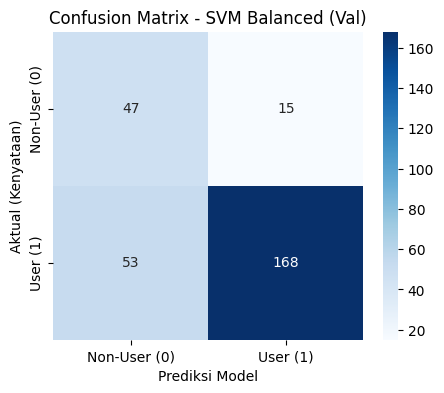

📦 Mengunduh model_svm.pkl...


In [18]:
# --- MODEL 2: SUPPORT VECTOR MACHINE (SVM) ----
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Fungsi Plot Confusion Matrix
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-User (0)', 'User (1)'],
                yticklabels=['Non-User (0)', 'User (1)'])
    plt.xlabel('Prediksi Model')
    plt.ylabel('Aktual (Kenyataan)')
    plt.title(title)
    plt.show()

# Inisialisasi Model SVM
# - kernel='rbf':untuk data psikologi yang kompleks/non-linear
# - class_weight='balanced':Karena data Imbalanced!
print("🚀 Training SVM (Balanced Weight)...")
model_svm = SVC(kernel='rbf', C=1.0, class_weight='balanced', random_state=42)

# Latih Model
model_svm.fit(X_train_scaled, y_train)

# Prediksi ke Data Validasi
y_pred_val_svm = model_svm.predict(X_val_scaled)

# Evaluasi Hasil
acc_svm = accuracy_score(y_val, y_pred_val_svm)
print(f"✅ Model SVM Selesai Dilatih!")
print(f"🎯 Akurasi SVM pada Validation Set: {acc_svm:.2%}")
print("-" * 40)

# Laporan Detail & Visualisasi
print("Laporan Klasifikasi (Validation):")
print(classification_report(y_val, y_pred_val_svm))

plot_cm(y_val, y_pred_val_svm, "Confusion Matrix - SVM Balanced (Val)")

#Simpan Model
nama_file_svm = 'model_svm.pkl'
joblib.dump(model_svm, nama_file_svm)
print(f"📦 Mengunduh {nama_file_svm}...")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🚀 Mulai Training Model Deep Learning (20 Epochs)...
Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4548 - loss: 0.7736 - val_accuracy: 0.7385 - val_loss: 0.5683
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7645 - loss: 0.5531 - val_accuracy: 0.7809 - val_loss: 0.4743
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7976 - loss: 0.4615 - val_accuracy: 0.7845 - val_loss: 0.4334
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7864 - loss: 0.4519 - val_accuracy: 0.8163 - val_loss: 0.4122
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8135 - loss: 0.4113 - val_accuracy: 0.8339 - val_loss: 0.4007
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8004 - loss: 0.4218 - val_accuracy: 0.8339 - val_loss: 0.3959
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8073 - loss: 0.4018 - val_accuracy: 0.8339 - val_loss: 0.3941
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy:

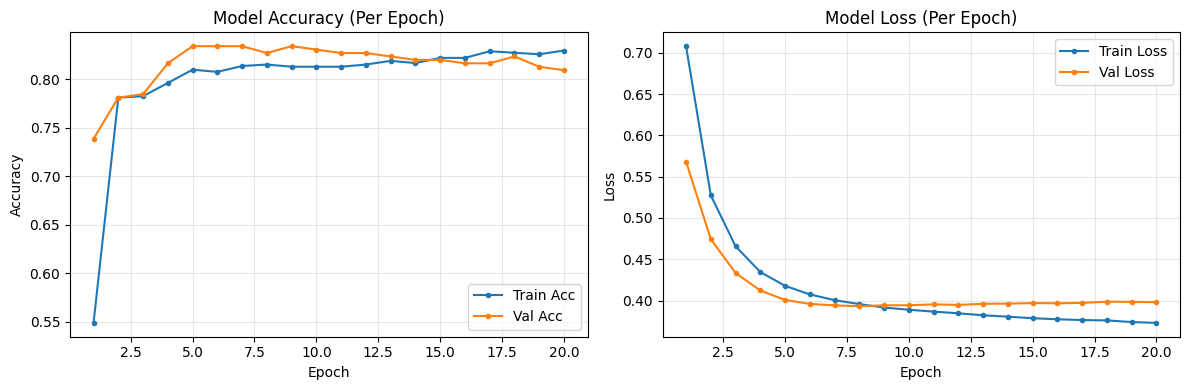

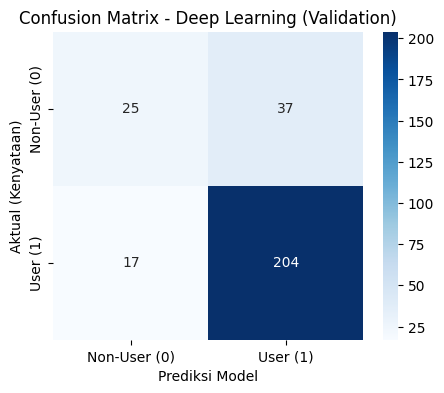

🎯 Akurasi Validation: 80.92%
----------------------------------------
Laporan Klasifikasi Lengkap (Validation Data):
              precision    recall  f1-score   support

           0       0.60      0.40      0.48        62
           1       0.85      0.92      0.88       221

    accuracy                           0.81       283
   macro avg       0.72      0.66      0.68       283
weighted avg       0.79      0.81      0.79       283

📦 Mengunduh model_dl.h5...


In [19]:
# --- MODEL 3: DEEP LEARNING ---
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time
from sklearn.metrics import confusion_matrix, classification_report

#Konfigurasi Arsitektur
model_dl = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("🚀 Mulai Training Model Deep Learning (20 Epochs)...")
start_time = time.time()

#Training
history = model_dl.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=20,
    batch_size=16,
    verbose=1
)

end_time = time.time()
print(f"✅ Training Selesai dalam {end_time - start_time:.2f} detik!")

# Visualisasi Grafik (Loss & Accuracy)
list_epoch = range(1, len(history.history['accuracy']) + 1)
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(list_epoch, history.history['accuracy'], label='Train Acc', marker='.')
plt.plot(list_epoch, history.history['val_accuracy'], label='Val Acc', marker='.')
plt.title('Model Accuracy (Per Epoch)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(list_epoch, history.history['loss'], label='Train Loss', marker='.')
plt.plot(list_epoch, history.history['val_loss'], label='Val Loss', marker='.')
plt.title('Model Loss (Per Epoch)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Prediksi ke Data Validasi (Untuk Evaluasi)
y_pred_prob_val = model_dl.predict(X_val_scaled, verbose=0)
y_pred_val_dl = (y_pred_prob_val > 0.5).astype("int32")

# Tampilkan Confusion Matrix Validation
cm_val = confusion_matrix(y_val, y_pred_val_dl)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-User (0)', 'User (1)'],
            yticklabels=['Non-User (0)', 'User (1)'])
plt.xlabel('Prediksi Model')
plt.ylabel('Aktual (Kenyataan)')
plt.title('Confusion Matrix - Deep Learning (Validation)')
plt.show()

# Print Akurasi Validation
_, acc_dl_val = model_dl.evaluate(X_val_scaled, y_val, verbose=0)
print(f"🎯 Akurasi Validation: {acc_dl_val:.2%}")
print("-" * 40)

# Classification Report
print("Laporan Klasifikasi Lengkap (Validation Data):")
print(classification_report(y_val, y_pred_val_dl))

#Simpan Model
nama_file_dl = 'model_dl.h5'
model_dl.save(nama_file_dl) # Simpan
print(f"📦 Mengunduh {nama_file_dl}...")

In [20]:
model_dl.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 917 (3.59 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 612 (2.39 KB)

🚀 Memulai Evaluasi Final pada Data Test...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

🏆 HASIL AKHIR PADA DATA TEST:
🎯 Akurasi Final: 80.57%
----------------------------------------


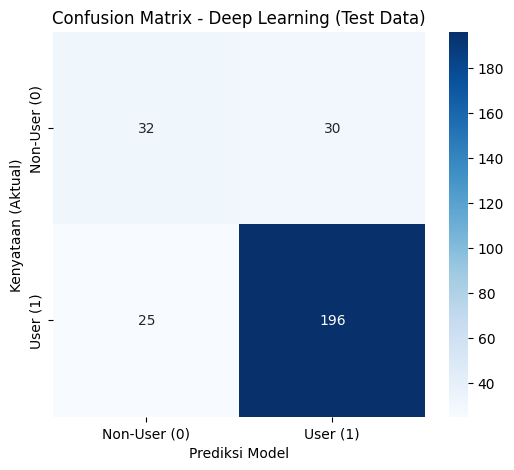


Laporan Klasifikasi Lengkap:
              precision    recall  f1-score   support

           0       0.56      0.52      0.54        62
           1       0.87      0.89      0.88       221

    accuracy                           0.81       283
   macro avg       0.71      0.70      0.71       283
weighted avg       0.80      0.81      0.80       283

----------------------------------------
🔍 SAMPEL HASIL PREDIKSI (10 Data Pertama):
|   Actual (Kenyataan) |   Predicted (Model) |   Probabilitas | Status   |
|---------------------:|--------------------:|---------------:|:---------|
|                    1 |                   1 |       0.942948 | ✅ Benar |
|                    1 |                   1 |       0.656748 | ✅ Benar |
|                    0 |                   1 |       0.81858  | ❌ Salah |
|                    1 |                   1 |       0.927593 | ✅ Benar |
|                    1 |                   1 |       0.779434 | ✅ Benar |
|                    0 |               

In [21]:
# --- EVALUASI FINAL (DATA TEST) - LENGKAP ---
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("🚀 Memulai Evaluasi Final pada Data Test...")

# 1. Prediksi menggunakan Data Test
y_pred_prob = model_dl.predict(X_test_scaled)

# 2. Ubah Probabilitas menjadi Kelas (0 atau 1)
y_pred_test = (y_pred_prob > 0.5).astype("int32").flatten()

# 3. Hitung Akurasi Final
acc_test = accuracy_score(y_test, y_pred_test)
print(f"\n🏆 HASIL AKHIR PADA DATA TEST:")
print(f"🎯 Akurasi Final: {acc_test:.2%}")
print("-" * 40)

# 4. Tampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-User (0)', 'User (1)'],
            yticklabels=['Non-User (0)', 'User (1)'])
plt.xlabel('Prediksi Model')
plt.ylabel('Kenyataan (Aktual)')
plt.title('Confusion Matrix - Deep Learning (Test Data)')
plt.show()

# Laporan Detail
print("\nLaporan Klasifikasi Lengkap:")
print(classification_report(y_test, y_pred_test))

print("-" * 40)
print("🔍 SAMPEL HASIL PREDIKSI (10 Data Pertama):")

# Buat DataFrame Perbandingan
df_hasil = pd.DataFrame({
    'Actual (Kenyataan)': y_test.values if hasattr(y_test, 'values') else y_test,
    'Predicted (Model)': y_pred_test,
    'Probabilitas': y_pred_prob.flatten()
})

# Tambahkan kolom Status (Benar/Salah)
df_hasil['Status'] = df_hasil.apply(
    lambda x: '✅ Benar' if x['Actual (Kenyataan)'] == x['Predicted (Model)'] else '❌ Salah', axis=1
)

# Tampilkan 10 baris pertama
print(df_hasil.head(10).to_markdown(index=False))

🚀 Sedang membandingkan performa 3 model pada DATA TEST...

🏆 TABEL PERBANDINGAN MODEL (DATA TEST):
----------------------------------------------------------------------------------------------------
| Model               |   Accuracy |   Precision (User) |   Recall (User) |   F1-Score |
|:--------------------|-----------:|-------------------:|----------------:|-----------:|
| Logistic Regression |     0.788  |             0.834  |          0.9095 |     0.6466 |
| SVM (Balanced)      |     0.6996 |             0.9146 |          0.6787 |     0.6548 |
| Deep Learning (MLP) |     0.8057 |             0.8673 |          0.8869 |     0.7074 |
----------------------------------------------------------------------------------------------------


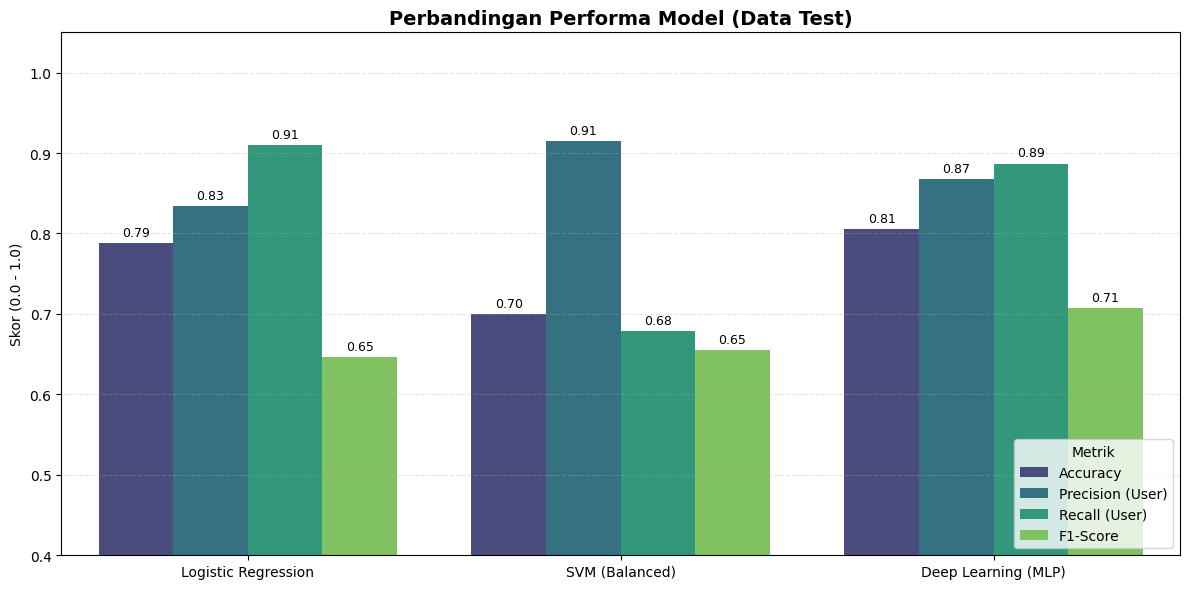

In [22]:
# --- KOMPARASI FINAL: TABEL & VISUALISASI ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("🚀 Sedang membandingkan performa 3 model pada DATA TEST...")


y_pred_lr = model_lr.predict(X_test_scaled)

y_pred_svm = model_svm.predict(X_test_scaled)

y_prob_dl = model_dl.predict(X_test_scaled, verbose=0)
y_pred_dl = (y_prob_dl > 0.5).astype("int32").flatten()


def get_score(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision (User)': precision_score(y_true, y_pred, pos_label=1),
        'Recall (User)': recall_score(y_true, y_pred, pos_label=1),
        'F1-Score': f1_score(y_true, y_pred, average='macro')
    }


ranking = []
ranking.append(get_score(y_test, y_pred_lr, 'Logistic Regression'))
ranking.append(get_score(y_test, y_pred_svm, 'SVM (Balanced)'))
ranking.append(get_score(y_test, y_pred_dl, 'Deep Learning (MLP)'))

# Buat DataFrame (Tabel)
df_ranking = pd.DataFrame(ranking)

print("\n🏆 TABEL PERBANDINGAN MODEL (DATA TEST):")
print("-" * 100)

print(df_ranking.round(4).to_markdown(index=False))
print("-" * 100)

plt.figure(figsize=(12, 6))


df_melt = df_ranking.melt(id_vars="Model", var_name="Metrik", value_name="Skor")


ax = sns.barplot(data=df_melt, x="Model", y="Skor", hue="Metrik", palette="viridis")

plt.title("Perbandingan Performa Model (Data Test)", fontsize=14, fontweight='bold')
plt.ylim(0.4, 1.05)
plt.ylabel("Skor (0.0 - 1.0)")
plt.xlabel("")
plt.legend(loc='lower right', title='Metrik')
plt.grid(axis='y', linestyle='--', alpha=0.3)


for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=9)

plt.tight_layout()
plt.show()